# Final Project - Data Science/Spatial Analysis

## 1. Project Title

Optimal siting of electric vehicle chargers in Tokyo

## 2. Team members

Sohei Yamada (A59004030) <br>
Yuki Imura (A59011525)

## 3. Questions we addressed, why it is important (5pt)

<p>Our overarching question is to find where are the optimal points to locate electric vehicle (EV) chargers in Tokyo. Therefore, we will perform an analysis using geographic information and machine learning to answer the following three questions:</p>

### Question 1: Do existing electric vehicle (EV) chargers have sufficient coverage to promote EVs?

<p>Since EVs require frequent recharging, EV adoption may be delayed in areas with small coverage. We will use data on EV charger locations in Tokyo to analyze the geographical coverage.</p>

### Question 2: Are the existing EV chargers unevenly distributed among certain socioeconomic communities?

<p>We hypothesize that EV chargers may be unevenly distributed in higher-income neighborhoods because EVs and EV chargers are expensive. This geographic bias may increase the disproportionate disparity in environmental impacts and health risks by community because gasoline vehicles emit more carbon dioxide, PM2.5 and other toxins than EVs. We will use municipality-level Tokyo metropolitan census data and EV charger location data to determine the relationship between socioeconomic characteristics and EV charger location by municipality-level analysis.</p>

### Question 3:  Where are the optimal places to locate EV charge stations (Places where several chargers are installed so that many EVs can be charged at the same time)?

<p>EV chargers should be located near major roads, gas stations, and shopping centers to improve convenience for drivers, but should not be located where flooding or landslides are expected to avoid safety issues. EV chargers should also not be installed in places where chronic traffic congestion occurs to reduce congestion. Thus, in addition to the important features we will find by answering question 2, we will look at other factors that are not belongs to municipalities. Then, we will propose where EV charge stations should be installed at the targeted municipalities which have low-coverage and low-probability of adding EV chargers, utilizing Japanese administrative and other data.</p>

<p>In light of these analyses, we will find optimal locations for new charging stations in most needed areas in Tokyo. Our analysis would promote EV penetration and contribute to the realization of net zero emissions (related to SDGs 13) efficiently and effectively.</p>


## 4. Background and literature (5pt)

<p>Greenhouse gas reduction has become an issue of global importance. Governments are instituting policies to transition from gasoline-powered vehicles to EVs with lower carbon dioxide emissions. For example, the state of California has decided that all new passenger cars sold in California will be zero-emission vehicles, including EVs, by 2035 (California Air Resources Board, n.d.). The EV penetration rate in California is 9.5%. On the other hand, Japan has also set a policy that all new passenger cars will be electric vehicles by 2035, but the EV penetration rate in 2021 is less than 1% (Momota, 2022). One of the reasons for the slow spread of EVs in Japan is the slow development of charging infrastructure. The number of EV charging facilities in Japan has remained at about 30,000 from 2018 to 2022, while governmental target is over 150,000 (Ministry of Economy, Trade and Industry, Japan, 2022). It is necessary to increase the number of EVs by installing charging facilities in optimal locations to popularize EVs in Japan.</p>

<p>Bayram et al. (2022) studied where to place fast chargers among existing gas stations to achieve the maximum coverage with the minimum number (Maximum coverage location problem). Their analysis did not include Tokyo, so we will conduct it and go farther by analyzing other factors of determining charger locations.</p>

<p>Erbaş et al. (2018) evaluated the suitability of existing EV charger locations in Ankara by setting 15 criteria for environmental, economic, and urbanity (multiple-criteria decision analysis), and proposed optimal placement of EV chargers in the study area. A map of the entire study area was created scoring the 15 criteria, and it was concluded that the location with the highest score was the best location for the EV chargers. We aplied their concept of using multiple criteria to Tokyo, Japan by conducting multiple analyses.</p>

<p>In addition, Xu et al. (2013) proposed a solution for the placement of chargers such that the operating distance is minimized (Minimum total transportation distance). However, this is a mathematical solution, not a geo-informed solution. Our machine learning usage can contribute to this problem solving reasonably.</p>

## 5. Python packages you used and why (5pt)

<p>We used the following libraries to perform our analysis:</p>

### (a) Pandas library

<p>Necessary to manipulate dataframes</p>

In [1]:
import pandas as pd

### (b) GeoPandas library

<p>Necessary to manipulate geospatial dataframes</p>

In [2]:
import geopandas as gpd

### (c) ArcGIS library

<p>Necessary to maximize coverage and minimize facilities</p>

In [63]:
import warnings
warnings.filterwarnings("ignore")

import arcgis
from arcgis.gis import GIS
from arcgis import geometry
from arcgis.geoenrichment import *
from arcgis.features import GeoAccessor, FeatureLayer, Feature, FeatureSet, FeatureCollection, find_locations
import arcgis.network as network

gis = GIS("https://ucsdonline.maps.arcgis.com/home/", client_id='xH567LTL8jqxk6wx')
#gis = GIS(username="gpec447sp23_15")

token = gis._con.token

Please sign in to your GIS and paste the code that is obtained below.
If a web browser does not automatically open, please navigate to the URL below yourself instead.
Opening web browser to navigate to: https://ucsdonline.maps.arcgis.com/sharing/rest/oauth2/authorize?response_type=code&client_id=xH567LTL8jqxk6wx&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&state=z8Plp3Wqwv2qmrrVkm0rfsHhH5imkS&allow_verification=false
Enter code obtained on signing in using SAML: ········


### (d) Matplotlib library

<p>Necessary to depict graphs</p>

In [4]:
import matplotlib.pyplot as plt

### (e) seaborn library

<p>Necessary to visualize statistical data</p>

In [5]:
import seaborn as sns

### (f) scikit-learn library

<p>Necessary to perform machine learning.</p>

In [6]:
from arcgis.features import GeoAccessor, GeoSeriesAccessor, FeatureLayerCollection
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor 
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

### (g) NumPy library

<p>Necessary to perform calcupation efficiently.</p>

In [7]:
import numpy as np

### (h) requests library

<p>Necessary to make it easy to manipulate HTTP requests.</p>

In [8]:
import requests

### (i) urllib library

<p>Necessary to make it easy to manipulate URL requests.</p></p>

In [9]:
import urllib

### (j) tqdm library

<p>Necessary to create a smart progress bar for the loops</p>

In [10]:
import tqdm

### (k) datetime library

<p>Necessary for date and time manipulation.</p>

In [11]:
from datetime import datetime

### (l) GeoPy library

<p>Necessary for geocoder for OpenStreetMap data.</p>

In [12]:
from geopy.geocoders import Nominatim

### (m) IPython library

<p>Necessary to use an interactive command-line terminal for Python</p>

In [13]:
from IPython.display import display

<center><b>Table 1: Libraries we use by question</b></center>

<table>
    <tr>
        <th></th>
        <th>(a)</th>
        <th>(b)</th>
        <th>(c)</th>
        <th>(d)</th>
        <th>(e)</th>
        <th>(f)</th>
        <th>(g)</th>
        <th>(h)</th>
        <th>(i)</th>
        <th>(j)</th>
        <th>(k)</th>
        <th>(l)</th>
        <th>(m)</th>
    </tr>
    <tr>
        <th>Question 1: Coverage</th>
        <td>✔</td>
        <td>✔</td>
        <td>✔</td>
        <td></td>
        <td></td>
        <td></td>
        <td></td>
        <td>✔</td>
        <td>✔</td>
        <td>✔</td>
        <td>✔</td>
        <td></td>
        <td></td>
    </tr>
    <tr>
        <th>Question 2: Socio-ecomonic ML</th>
        <td>✔</td>
        <td>✔</td>
        <td>✔</td>
        <td>✔</td>
        <td>✔</td>
        <td>✔</td>
        <td>✔</td>
        <td></td>
        <td></td>
        <td></td>
        <td></td>
        <td></td>
        <td></td>
    </tr>
    <tr>
        <th>Question 3: Optimal location-allocation</th>
        <td>✔</td>
        <td>✔</td>
        <td>✔</td>
        <td></td>
        <td></td>
        <td></td>
        <td>✔</td>
        <td></td>
        <td></td>
        <td></td>
        <td></td>
        <td>✔</td>
        <td>✔</td>
    </tr>
</table>

## 6. Data sources (10pt)

### Inputs and outputs

<p>This code requires the following input files and outpus the following files. These files are located in the following directry:</p>

In [14]:
path = "https://raw.githubusercontent.com/yimurayimura/GIS-Final-Project/main/" 

#### Input files

<center><b>Table 2: List of inputs of this code</b></center>

<table>
    <tr>
        <th>File name</th>
        <th>Description</th>
    </tr>
    <tr>
        <td>EVC_location.csv</td>
        <td>EV charger location data thoroughout Japan, which includes the name and physical address of locations in Japanese language and the number of chargers.</td>
    </tr>
    <tr>
        <td>JR_commuter_stationLevel.csv</td>
        <td>Location data of the stations in Tokyo of East Japan Railway Company, which includes the name and the number of yearly passenges.</td>
    </tr>
    <tr>
        <td>h02_13.csv</td>
        <td>Town (One level lower than the city-level) names and population data in Tokyo.</td>
    </tr>
    <tr>
        <td>X_tokyo.csv</td>
        <td>City names and their social data including populations and monthly expenditures of 23 cities in Tokyo.</td>
    </tr>
</table>

#### Output files

<center><b>Table 3: List of outputs of this code</b></center>

<table>
    <tr>
        <th>File name</th>
        <th>Description</th>
    </tr>
    <tr>
        <td>EVC_loc_tokyo</td>
        <td>EV charger location data thoroughout Tokyo, which includes longitudes, latitudes and the number of chargers.</td>
    </tr>
    <tr>
        <td>station_loc.csv</td>
        <td>Location data of the stations in Tokyo of East Japan Railway Company, which includes longitudes, latitudes and the number of daily passenges.</td>
    </tr>
    <tr>
        <td>tract_tokyo.csv</td>
        <td>Longitude, latitude and population data for each town in Tokyo.</td>
    </tr>
</table>





### EV charger location data

EVC_location.csv

<b> Gas station location</b>
<p>https://nlftp.mlit.go.jp/ksj/gml/datalist/KsjTmplt-P07-v2_1.html</p>

### Tract data

h02_13.csv

<p>https://www.e-stat.go.jp/stat-search/files?page=1&query=%E7%94%BA%E4%B8%81%E3%80%80%E4%BA%BA%E5%8F%A3%E3%80%80%E6%9D%B1%E4%BA%AC%E9%83%BD&layout=dataset&stat_infid=000032163274&metadata=1&data=1</p>

## 7. Data cleaning we have done (10pt)

### Data cleaning for EV charger location data

<p>The location information of the acquired EV charger location is written in Japanese address. Therefore, it is necessary to convert the Japanese address into latitude and longitude to map the coverage of the EV charger. We used the API of the Ministry of Land, Infrastructure, Transport and Tourism (MLIT) to convert the information to latitude and longitude, and saved it as a CSV file.</p>

In [15]:
## Load EV charger location data
#EVC_loc = pd.read_csv(path+'EVC_location.csv', encoding='cp932')
#
## Choose locations in Tokyo
#EVC_loc_tokyo = EVC_loc[EVC_loc['所在地'].str.contains("東京都")]
#EVC_loc_tokyo = EVC_loc_tokyo[['設置場所名称','所在地','急速充電器基数','普通充電器基数','施設カテゴリー']]
#EVC_loc_tokyo_address = EVC_loc_tokyo['所在地']
#
## Add lon/lat
#lonlat = []
#makeUrl = "https://msearch.gsi.go.jp/address-search/AddressSearch?q="
#for x in tqdm.tqdm(EVC_loc_tokyo_address):
#    try:
#        address = x
#        s_quote = urllib.parse.quote(address)
#        response = requests.get(makeUrl + s_quote)
#        lonlat.append(response.json()[0]["geometry"]["coordinates"])
#    except:
#        lonlat.append('')
#
#EVC_loc_tokyo['lonlat'] = lonlat
#
#EVC_loc_tokyo = EVC_loc_tokyo.rename(columns={"設置場所名称": "name", "所在地": "address", "急速充電器基数": "EVC_rapid", 
#                                              "普通充電器基数": "EVC_regular", "施設カテゴリー": "category"})

<p>For numerical manipulation, we converted the data type from string to float for the number of rapid and regular EV chargers.</p>

In [16]:
#EVC_loc_tokyo['EVC_rapid'] = EVC_loc_tokyo['EVC_rapid'].astype('float')
#EVC_loc_tokyo['EVC_regular'] = EVC_loc_tokyo['EVC_regular'].astype('float')
#EVC_loc_tokyo.to_csv(path+'EVC_loc_tokyo.csv')
#EVC_loc_tokyo

### Data cleaning for station data

<p><font color="red"><b>DELETE THIS SECTION IF UNNECESSARY</b></font></p>

In [17]:
#station_loc = pd.read_csv('JR_commuter_stationLevel.csv', encoding='cp932')
#station_loc['station'] = station_loc['station']+"駅"
#station_loc_address = station_loc['station']
#
## Add lon/lat
#lon = []
#lat = []
#geolocator = Nominatim(user_agent="user")
#
#for x in tqdm.tqdm(station_loc_address):
#    try:
#        location = geolocator.geocode(x)
#        lon.append(location.longitude)
#        lat.append(location.latitude)
#    except:
#        lon.append('')
#        lat.append('')
#        
#station_loc['lon'] = lon
#station_loc['lat'] = lat
#
#station_loc['total'] = station_loc['total']/365
#station_loc['pass'] = station_loc['pass']/365
#station_loc['ticket'] = station_loc['ticket']/365
#
#station_loc.to_csv('station_loc.csv')
#display(station_loc)

### Data cleaning for tract data

In [59]:
#tract = pd.read_csv(path+'h02_13.csv', encoding='cp932')
#
#tract_tokyo = tract
#tract_tokyo_address = tract['address']
#
## Add lon/lat
#lon = []
#lat = []
#geolocator = Nominatim(user_agent="user")
#
#for x in tqdm.tqdm(tract_tokyo_address):
#    try:
#        location = geolocator.geocode(x)
#        lon.append(location.longitude)
#        lat.append(location.latitude)
#    except:
#        lon.append('')
#        lat.append('')
#
#tract_tokyo['lon'] = lon
#tract_tokyo['lat'] = lat
#
#tract_tokyo.to_csv(path+'tract_tokyo.csv')
#display(tract_tokyo)

100%|██████████| 1787/1787 [15:33<00:00,  1.91it/s]


,address,pop,hh,lon,lat
0,東京都千代田区丸の内,NaN,NaN,139.765181,35.680439
1,東京都千代田区大手町,NaN,NaN,139.766461,35.684609
2,東京都千代田区内幸町,NaN,NaN,139.75538,35.669456
3,東京都千代田区有楽町,18.0,15.0,139.762136,35.675969
4,東京都千代田区霞が関,12.0,12.0,139.745124,35.672078
...,...,...,...,...,...
1782,東京都小笠原村聟島,NaN,NaN,142.142874,27.680008
1783,東京都小笠原村硫黄島,359.0,30.0,141.316795,24.784942
1784,東京都小笠原村硫黄島,359.0,30.0,141.316795,24.784942
1785,東京都小笠原村沖ノ鳥島,NaN,NaN,136.073824,20.422913


## 8. Descriptive statistics for the data (10pt)

## 9. Analysis (25pt)

### Question 1: Do existing EV chargers have sufficient coverage to promote EVs?

<p>First, we map locations within a 10-minute drive from points in Tokyo where <u>at least one rapid chargers</u> are installed.</p>

In [19]:
service_area_url = gis.properties.helperServices.serviceArea.url
service_area_url

'https://route.arcgis.com/arcgis/rest/services/World/ServiceAreas/NAServer/ServiceArea_World'

In [20]:
sa_layer = network.ServiceAreaLayer(service_area_url, gis=gis)

In [21]:
EVC_loc_tokyo = pd.read_csv(path+'EVC_loc_tokyo.csv')

EVC_loc_tokyo_subset_1 = EVC_loc_tokyo[EVC_loc_tokyo['EVC_rapid']>=1]
EVC_loc_tokyo_subset_1 = EVC_loc_tokyo_subset_1.reset_index(drop=True)

sa_results = []
times = [datetime(2017, 6, 10, 12).timestamp() * 1000]

for i in tqdm.tqdm(range(len(EVC_loc_tokyo_subset_1))):
    facilities = EVC_loc_tokyo_subset_1.loc[i,'lonlat'].replace('[', '').replace(']', '')
    result = sa_layer.solve_service_area(facilities=facilities, default_breaks=[10],
                                         travel_direction='esriNATravelDirectionFromFacility',
                                         time_of_day=times, time_of_day_is_utc=False)
    sa_results.append(result)

100%|██████████| 353/353 [01:02<00:00,  5.62it/s]


In [22]:
tokyo_fset_list=[]
for result in sa_results:
    poly_feat_list = []
    for polygon_dict in result['saPolygons']['features']:
        f1 = Feature(polygon_dict['geometry'], polygon_dict['attributes'])
        poly_feat_list.append(f1)
        
    service_area_fset = FeatureSet(poly_feat_list, 
                         geometry_type=result['saPolygons']['geometryType'],
                         spatial_reference= result['saPolygons']['spatialReference'])
    
    tokyo_fset_list.append(service_area_fset)

In [23]:
tokyo_map_1 = gis.map('Tokyo, Japan', zoomlevel=10)
tokyo_map_1

MapView(layout=Layout(height='400px', width='100%'))

In [24]:
tokyo_map_1.clear_graphics()

for fset in tqdm.tqdm(tokyo_fset_list):
    tokyo_map_1.draw(fset)

100%|██████████| 353/353 [01:34<00:00,  3.75it/s]


<p>A single rapid charger cannot charge multiple EVs at the same time. Therefore, we next map locations within a 10-minute drive from where <u>two or more rapid chargers</u> are installed.</p>

In [25]:
EVC_loc_tokyo_subset_2 = EVC_loc_tokyo[EVC_loc_tokyo['EVC_rapid']>=2]
EVC_loc_tokyo_subset_2 = EVC_loc_tokyo_subset_2.reset_index(drop=True)

sa_results = []
times = [datetime(2017, 6, 10, 12).timestamp() * 1000]

for i in tqdm.tqdm(range(len(EVC_loc_tokyo_subset_2))):
    facilities = EVC_loc_tokyo_subset_2.loc[i,'lonlat'].replace('[', '').replace(']', '')
    result = sa_layer.solve_service_area(facilities=facilities, default_breaks=[10]
                                         travel_direction='esriNATravelDirectionFromFacility',
                                         time_of_day=times, time_of_day_is_utc=False)
    sa_results.append(result)

100%|██████████| 46/46 [00:08<00:00,  5.53it/s]


In [26]:
tokyo_fset_list=[]
for result in sa_results:
    poly_feat_list = []
    for polygon_dict in result['saPolygons']['features']:
        f1 = Feature(polygon_dict['geometry'], polygon_dict['attributes'])
        poly_feat_list.append(f1)
        
    service_area_fset = FeatureSet(poly_feat_list, 
                         geometry_type=result['saPolygons']['geometryType'],
                         spatial_reference= result['saPolygons']['spatialReference'])
    
    tokyo_fset_list.append(service_area_fset)

In [27]:
tokyo_map_2 = gis.map('Tokyo, Japan', zoomlevel=10)
tokyo_map_2

MapView(layout=Layout(height='400px', width='100%'))

In [28]:
tokyo_map_2.clear_graphics()

for fset in tqdm.tqdm(tokyo_fset_list):
    tokyo_map_2.draw(fset)

100%|██████████| 46/46 [00:02<00:00, 20.25it/s]


### Question 2: Are the existing EV chargers unevenly distributed among certain socioeconomic communities?

<p>Secondly, we will do socio-economic analysis by using random forest regressions. The first step is to import the municipality level boundary data.</p>

In [44]:
serviceURL = "https://services.arcgis.com/wlVTGRSYTzAbjjiC/arcgis/rest/services/全国市区町村界データ2022/FeatureServer"
item = FeatureLayerCollection(serviceURL, gis=gis)
muni = pd.DataFrame.spatial.from_layer(item.layers[0]) # Included all boundary data in Japan

In [35]:
EVC_loc_tokyo_subset_2

,Unnamed: 0,name,address,EVC_rapid,EVC_regular,category,lonlat,lon,lat
0,3851,ＯＴＥＭＡＣＨＩ ＯＮＥ,東京都千代田区大手町一丁目２番１号,3,0,その他,"[139.76265, 35.687737]",139.762650,35.687737
1,3852,ホテルニューオータニ東京,東京都千代田区紀尾井町４－１,2,0,宿泊施設,"[139.734283, 35.680435]",139.734283,35.680435
2,3856,ＧＩＮＺＡ ＳＩＸ,東京都中央区銀座六丁目１０番１号,2,0,大規模小売店舗,"[139.763351, 35.669445]",139.763351,35.669445
3,3869,日産自動車販売白金店,東京都港区白金６丁目２３－４,2,0,自動車ディーラー,"[139.721268, 35.644115]",139.721268,35.644115
4,3872,東京ポートシティ竹芝オフィスタワー,東京都港区海岸１－７－１海岸東京ポートシティ竹芝オフィスタワー１階,2,0,その他,"[139.760864, 35.655045]",139.760864,35.655045
5,3902,メルセデス・ベンツ文京,東京都文京区小石川１－２１－３,2,0,自動車ディーラー,"[139.751495, 35.714432]",139.751495,35.714432
6,3911,メルセデス・ベンツ墨田,東京都墨田区吾妻橋１－１－１,3,0,自動車ディーラー,"[139.798782, 35.707607]",139.798782,35.707607
7,3925,日本科学未来館,東京都江東区青海２－３－６,2,0,その他,"[139.776657, 35.620018]",139.776657,35.620018
8,3937,モビリティ東京 有明店,東京都江東区有明１－４－２９,2,1,自動車ディーラー,"[139.785583, 35.635536]",139.785583,35.635536
9,3938,モビリティ東京 レクサス有明,東京都江東区有明１－４－２９,2,1,自動車ディーラー,"[139.785583, 35.635536]",139.785583,35.635536


In [45]:
# Clean the JCODE column
muni["JCODE"] = muni["JCODE"].str.strip()  # Remove leading and trailing whitespaces
muni["JCODE"] = pd.to_numeric(muni["JCODE"], errors="coerce")  # Convert non-numeric values to NaN

# Filter the municipalities in Tokyo (JCODE=13101~13123)
tokyo_muni = muni[muni["JCODE"].between(13101, 13123)]

# Set geometory and CRS
EVC_loc_tokyo_subset_2['lonlat'] = EVC_loc_tokyo_subset_2['lonlat'].str.replace(r'[][]', '', regex=True)

EVC_loc_tokyo_subset_2['lon'] = EVC_loc_tokyo_subset_2['lonlat'].str.split(',').str[0]
EVC_loc_tokyo_subset_2['lat'] = EVC_loc_tokyo_subset_2['lonlat'].str.split(',').str[1]

EVC_loc_tokyo_subset_2 = gpd.GeoDataFrame(
    EVC_loc_tokyo_subset_2, geometry=gpd.points_from_xy(EVC_loc_tokyo_subset_2.lon, EVC_loc_tokyo_subset_2.lat))
EVC_loc_tokyo_subset_2 = EVC_loc_tokyo_subset_2.set_geometry('geometry')

tokyo_muni = tokyo_muni.set_geometry('SHAPE', crs='EPSG:4326')

# Merge boundary data with EVC data
muni_EVC = gpd.sjoin(EVC_loc_tokyo_subset_2, tokyo_muni, op='within')
grouped_EVC = muni_EVC.groupby('CITY_ENG')['EVC_rapid'].sum()

In [46]:
# Import cleaned X variable data for municipalities
X_tokyo = pd.read_csv(path+"X_tokyo.csv", nrows=23)
X_tokyo

,Index,CITY_ENG,expenditure,car_owener,parking,total_pop,net_inflow_pop,foreign_pop,net_migration,hh_member,assisted,land_total,land_house,land_farm,land unused,road_length,road_area,employee
0,1,Chiyoda-ku,"63,456","31,715","18,349","66,680","794,656","2,814",387,1.79,577,"1,136.20",657.5,0.0,13.6,"175,508","2,787,768","31,065"
1,2,Chuo-ku,"129,262","42,283","16,848","169,179","467,419","8,062",301,1.82,"1,029","1,045.30",459.4,0.0,37.7,"194,215","3,047,548","35,745"
2,3,Minato-ku,"180,965","77,078","22,934","260,486","697,492","16,929",282,1.77,"1,727","2,098.50","1,266.80",0.0,57.7,"303,775","4,448,059","37,116"
3,4,Shinjuku-ku,"166,673","51,356","15,880","349,385","441,988","33,907","1,558",1.55,"8,908","1,825.40","1,243.80",0.1,28.3,"356,515","3,415,571","32,274"
4,5,Bunkyo-ku,"125,897","31,344","3,411","240,069","126,408","9,746",711,1.77,"1,921","1,135.20",795.6,0.0,12.5,"207,455","1,955,589","13,018"
5,6,Taito-ku,"114,411","32,515","4,030","211,444","105,857","13,896",427,1.70,"7,611","1,007.80",559.1,0.0,10.5,"258,517","2,626,920","22,770"
6,7,Sumida-ku,"139,457","47,078","5,082","272,085","22,907","11,892",834,1.85,"6,381","1,371.10",758.9,0.0,15.9,"296,988","2,958,672","15,492"
7,8,Koto-ku,"223,534","111,696","34,325","524,310","110,425","29,275",584,1.97,"7,684","4,197.40","1,999.00",1.0,182.1,"396,365","5,755,680","18,024"
8,9,Shinagawa-ku,"186,459","69,840","10,961","422,488","157,167","12,538",-678,1.77,"4,561","2,344.70","1,369.70",0.2,26.0,"392,543","4,030,594","20,123"
9,10,Meguro-ku,"122,182","52,721","2,172","288,088","16,209","8,794",-835,1.84,"2,400","1,475.90","1,085.00",2.2,22.6,"359,463","2,319,238","11,389"


In [47]:
# Merge it to dataset with y variable
dataset = X_tokyo.merge(grouped_EVC, on='CITY_ENG', how='left')
dataset['EVC_rapid'] = dataset['EVC_rapid'].fillna(0)

# Delete unnecessary columns
dataset = dataset.drop(columns=["Index", "CITY_ENG"])
display(dataset.isnull().sum(), dataset.info())

# Unsure whther the scaling needed or not if we include total population variable.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23 entries, 0 to 22
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   expenditure     23 non-null     object 
 1   car_owener      23 non-null     object 
 2   parking         23 non-null     object 
 3   total_pop       23 non-null     object 
 4   net_inflow_pop  23 non-null     object 
 5   foreign_pop     23 non-null     object 
 6   net_migration   23 non-null     object 
 7   hh_member       23 non-null     float64
 8   assisted        23 non-null     object 
 9   land_total      23 non-null     object 
 10  land_house      23 non-null     object 
 11  land_farm       23 non-null     float64
 12  land unused     23 non-null     float64
 13  road_length     23 non-null     object 
 14  road_area       23 non-null     object 
 15  employee        23 non-null     object 
 16  EVC_rapid       23 non-null     float64
dtypes: float64(4), object(13)
memory usag

expenditure       0
car_owener        0
parking           0
total_pop         0
net_inflow_pop    0
foreign_pop       0
net_migration     0
hh_member         0
assisted          0
land_total        0
land_house        0
land_farm         0
land unused       0
road_length       0
road_area         0
employee          0
EVC_rapid         0
dtype: int64

None

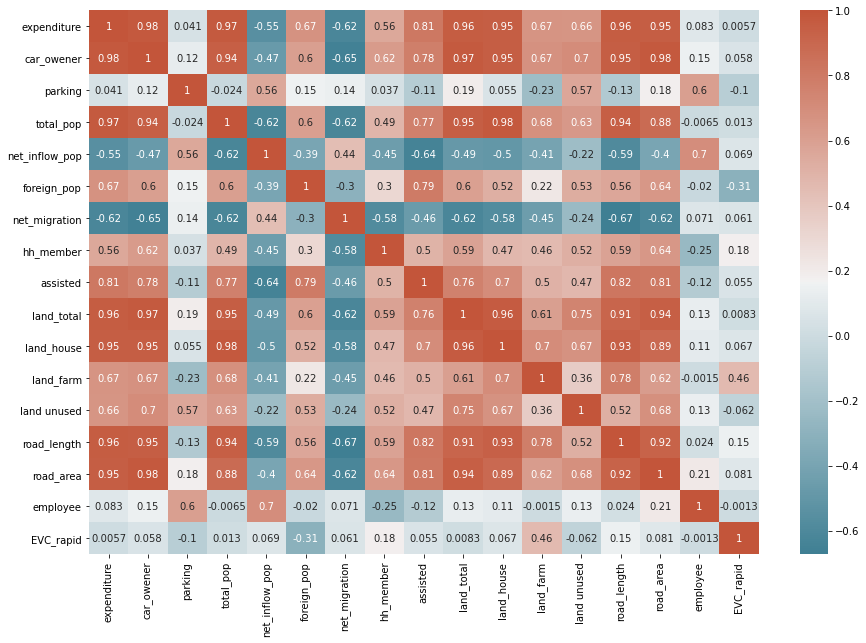

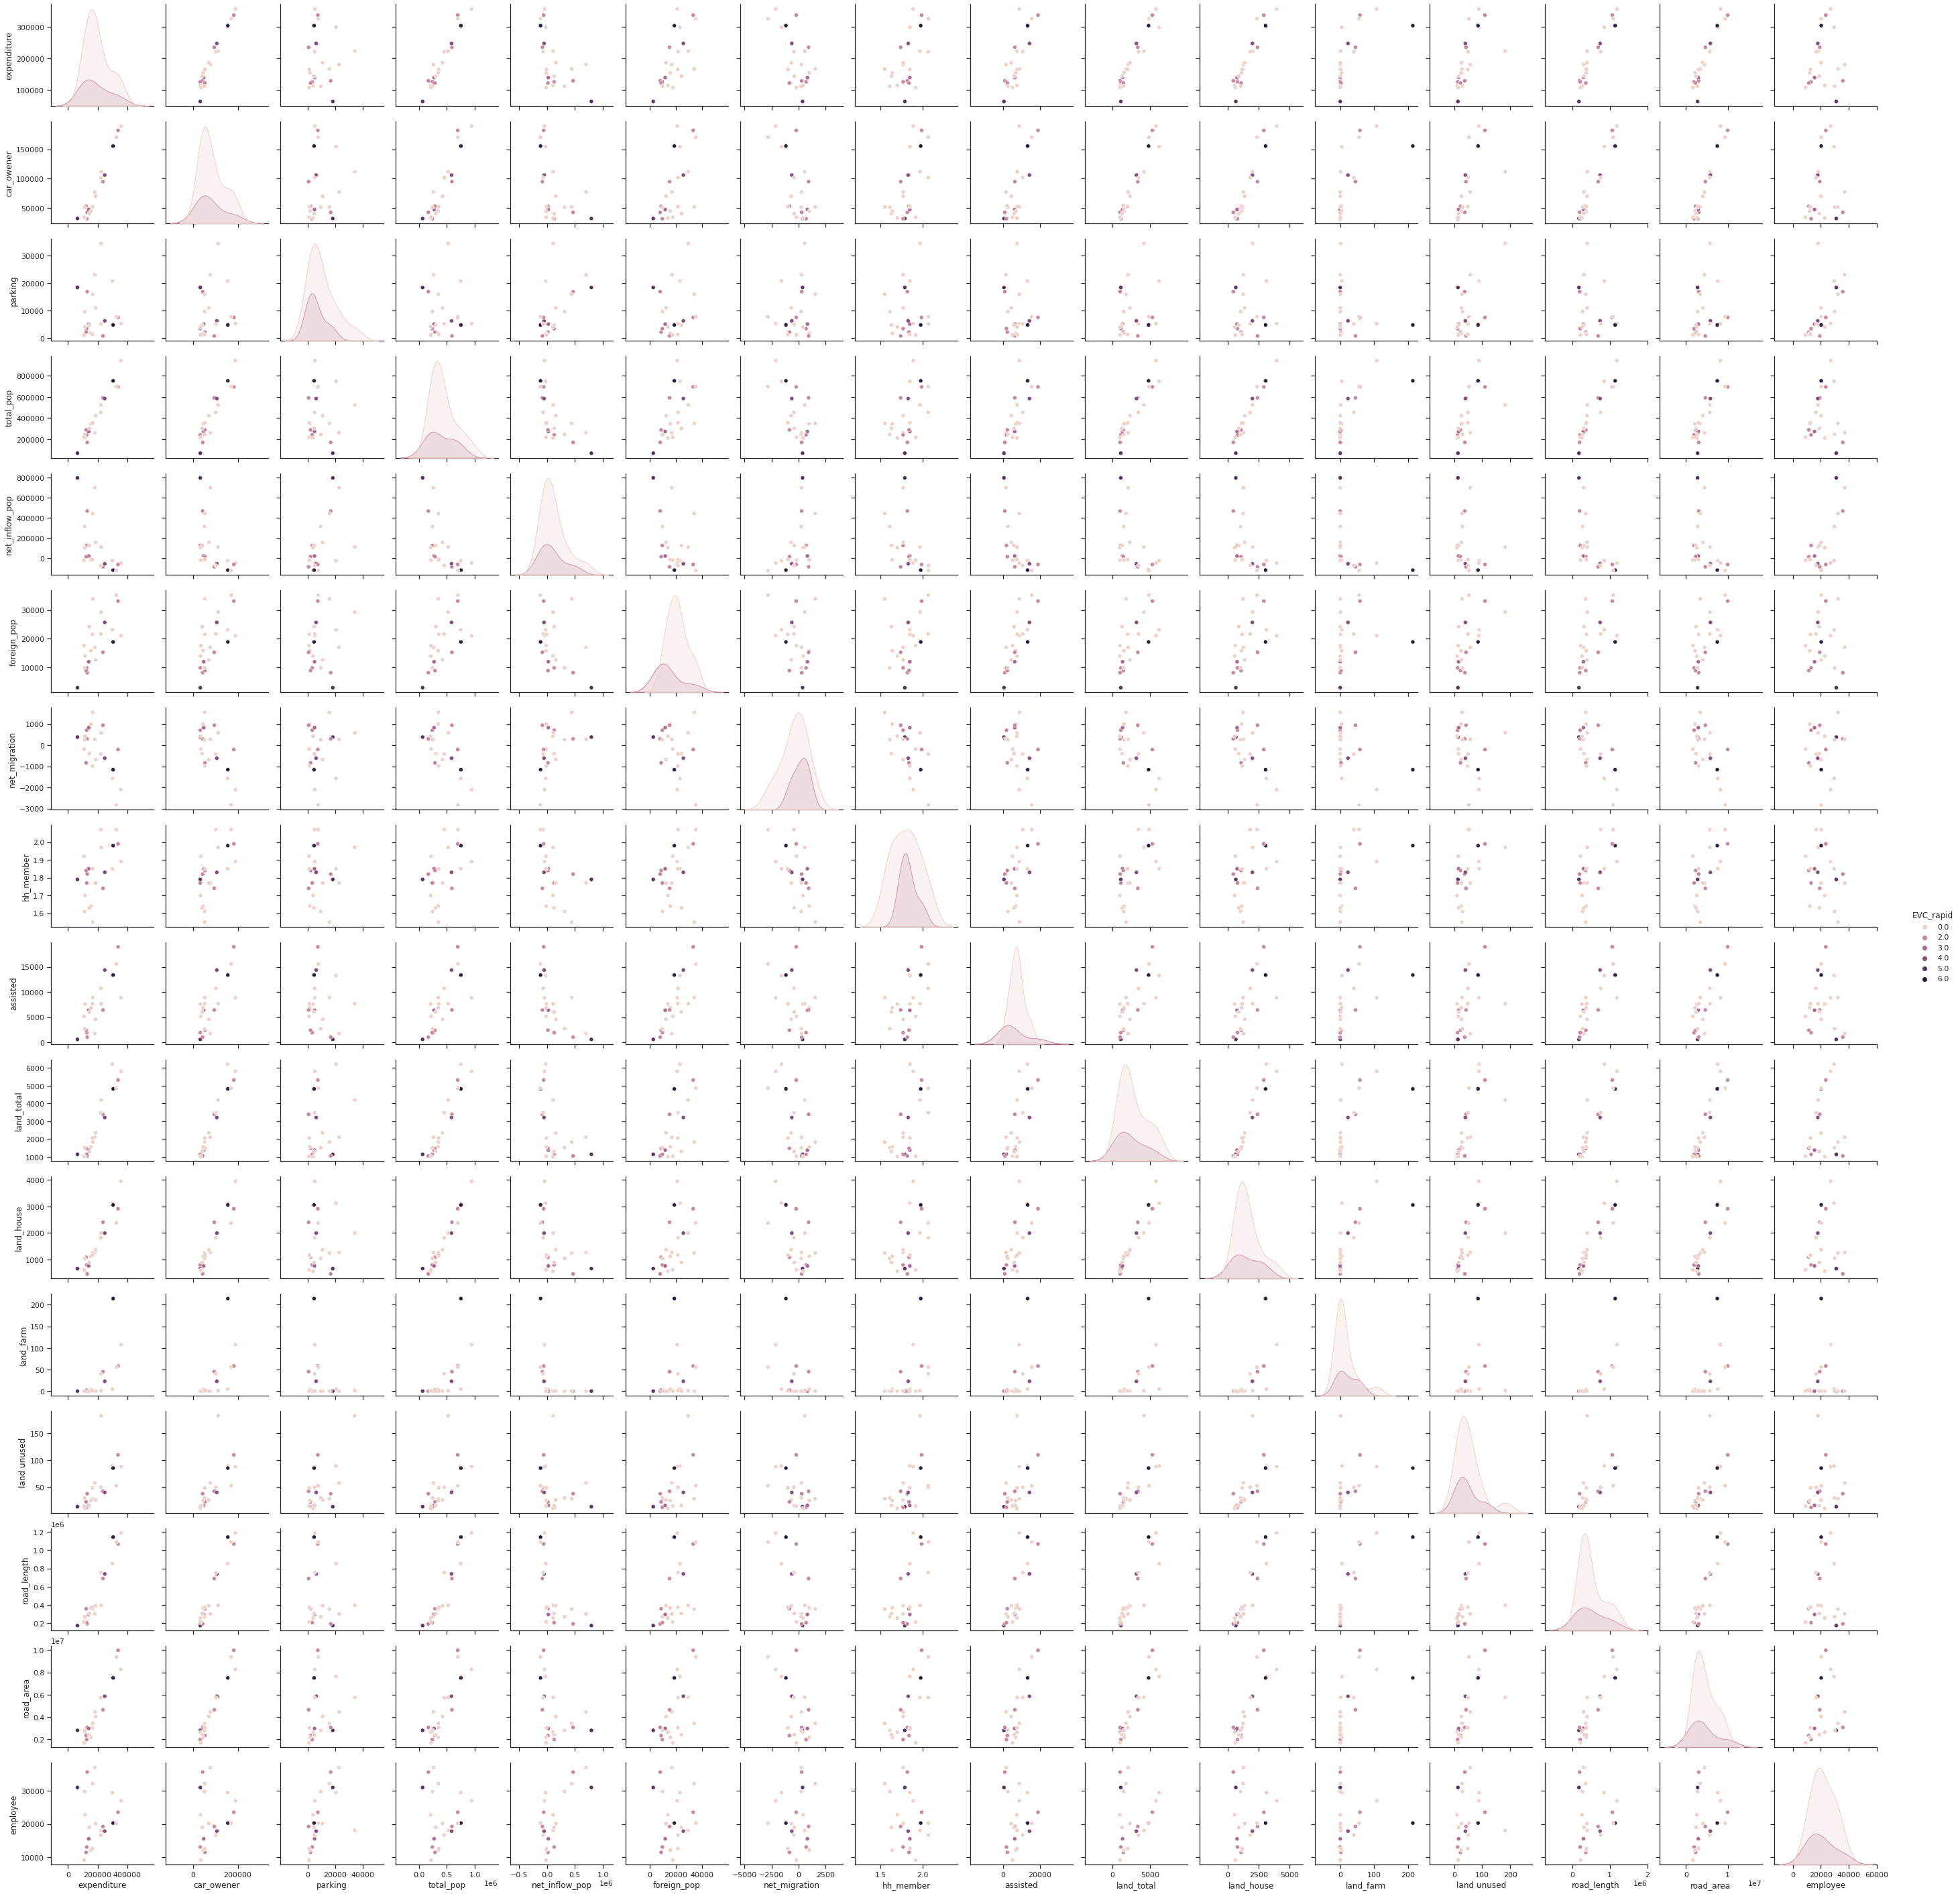

In [48]:
# Convert data type to float64 for making a correlation heatmap & a pairwise plot
dataset = dataset.replace(',', '', regex=True).astype(float)

corr = dataset.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

sns.set_theme(style="ticks")
sns.pairplot(dataset, hue = "EVC_rapid")

plt.show()

In [49]:
# Drop highly correlated variables to avoid multi-collinearity
# Since we believe road length is an essential variable, these are must-drop variables
drop_columns = ["expenditure", "car_owener", "total_pop", "assisted", "land_total", "land_house", "road_area"]
dataset_reg = dataset.drop(columns=drop_columns)

# Check the result if needed. We confirmed that residual variables are not highly correlated.
#corr = dataset_reg.corr()
#plt.subplots(figsize=(15,10))
#sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

In [50]:
labels = ['parking','net_inflow_pop', 'foreign_pop', 'net_migration', 'hh_member','land_farm','land_unused', 'road_length','employee']

R² of Random Forest Regressor on training set: 0.779
R² of Random Forest Regressor on test set: -1.797


<AxesSubplot:title={'center':'Feature importance'}>

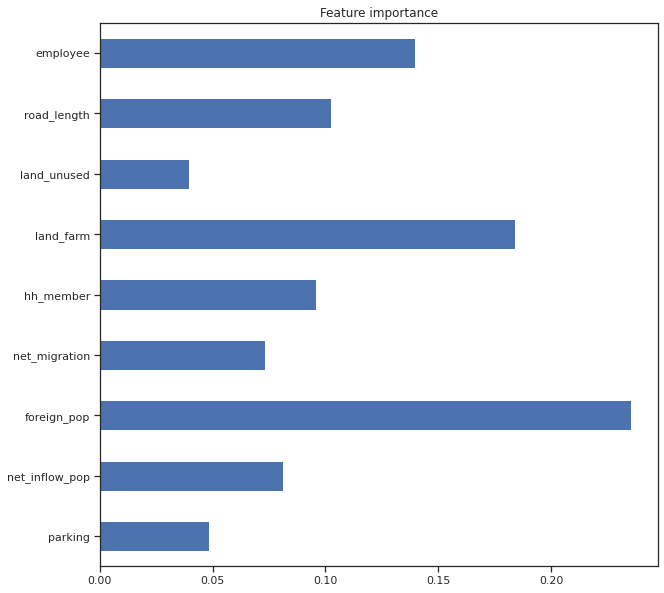

In [51]:
seed = 12

y = dataset_reg["EVC_rapid"]
X = dataset_reg.drop("EVC_rapid", axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = seed)

rf = RandomForestRegressor(n_estimators=100, random_state=seed)
rf.fit(X_train, y_train)
r1 = rf.score(X_train, y_train)
r2 = rf.score(X_test, y_test)
print('R² of Random Forest Regressor on training set: {:.3f}'.format(r1))
print('R² of Random Forest Regressor on test set: {:.3f}'.format(r2))
feat_importances = pd.Series(rf.feature_importances_, index=labels)
feat_importances.plot.barh(figsize=(10,10), title="Feature importance")

R² of Random Forest Regressor on training set: 0.784
R² of Random Forest Regressor on test set: -2.069


<AxesSubplot:title={'center':'Feature importance'}>

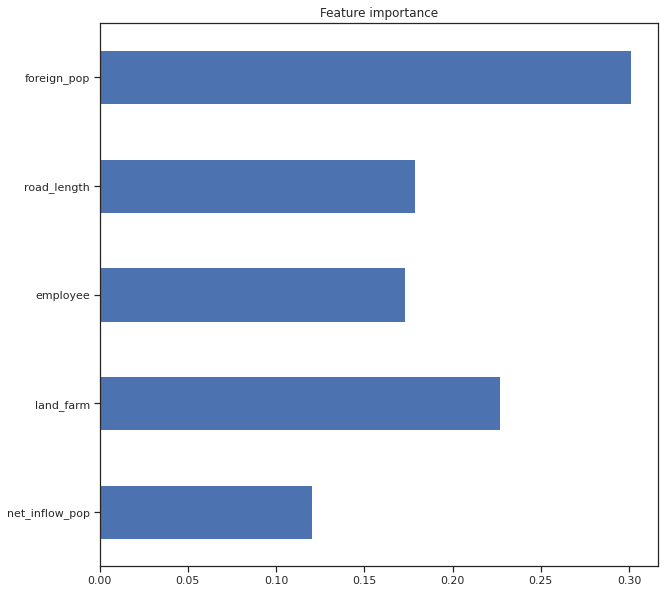

In [52]:
labels_top5 =["net_inflow_pop", "land_farm", "employee", "road_length", "foreign_pop"]

X = dataset_reg[labels_top5]
                
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = seed)

rf = RandomForestRegressor(n_estimators=100, random_state=seed)
rf.fit(X_train, y_train)
r1 = rf.score(X_train, y_train)
r2 = rf.score(X_test, y_test)
print('R² of Random Forest Regressor on training set: {:.3f}'.format(r1))
print('R² of Random Forest Regressor on test set: {:.3f}'.format(r2))
feat_importances = pd.Series(rf.feature_importances_, index=labels_top5)
feat_importances.plot.barh(figsize=(10,10), title="Feature importance")

In [53]:
# It looks net-inflow of population is the most important while overall accuracy is low.

print(X_tokyo[['CITY_ENG', 'net_inflow_pop']].sort_values('net_inflow_pop', ascending=False))

         CITY_ENG net_inflow_pop
0      Chiyoda-ku        794,656
2       Minato-ku        697,492
1         Chuo-ku        467,419
3     Shinjuku-ku        441,988
12     Shibuya-ku        314,567
6       Sumida-ku         22,907
9       Meguro-ku         16,209
8    Shinagawa-ku        157,167
4       Bunkyo-ku        126,408
15     Toshima-ku        125,978
7         Koto-ku        110,425
5        Taito-ku        105,857
14    Suginami-ku        -84,022
21  Katsushika-ku        -70,577
20      Adachi-ku        -61,152
18    Itabashi-ku        -53,816
11    Setagaya-ku        -46,477
10         Ota-ku        -23,216
17     Arakawa-ku        -18,260
13      Nakano-ku        -14,945
22     Edogawa-ku       -119,819
19      Nerima-ku       -116,636
16        Kita-ku        -11,323


### Question 3: Where are the optimal places to locate EV charge stations?

In [54]:
candidate = pd.read_csv(path+"EVC_loc_tokyo.csv")
candidate['lonlat'] = candidate['lonlat'].str.replace(r'[][]', '', regex=True)

candidate['lon'] = candidate['lonlat'].str.split(',').str[0]
candidate['lat'] = candidate['lonlat'].str.split(',').str[1]

candidate = candidate[['name','lon','lat']]
candidate['FacilityType'] = 2

facilities = candidate.dropna()

facilities_final = gpd.GeoDataFrame()
facilities_final['geometry'] = None

facilities = gpd.GeoDataFrame(
    facilities, geometry=gpd.points_from_xy(facilities.lon, facilities.lat))
facilities_final['geometry'] = facilities['geometry']

facilities_final = facilities_final.set_geometry('geometry')
facilities_final

,geometry
0,POINT (139.75151 35.69471)
1,POINT (139.77461 35.69864)
2,POINT (139.76265 35.68774)
3,POINT (139.73428 35.68044)
4,POINT (139.76379 35.68105)
...,...
607,POINT (139.27971 35.74148)
608,POINT (139.28035 35.73983)
609,POINT (139.15190 35.73049)
610,POINT (139.11830 35.74063)


In [55]:
candidate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 612 entries, 0 to 611
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          612 non-null    object
 1   lon           612 non-null    object
 2   lat           612 non-null    object
 3   FacilityType  612 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 19.2+ KB


In [60]:
tract = pd.read_csv(path+'tract_tokyo.csv', encoding='UTF-8')
tract = tract[['pop','lon','lat']]

demand = tract.dropna(how='any').reset_index(drop=True)

demand_points = gpd.GeoDataFrame()
demand_points['geometry'] = None
display(demand.lon)

demand = gpd.GeoDataFrame(
    demand, geometry=gpd.points_from_xy(demand.lon, demand.lat))
demand_points['geometry'] = demand['geometry']

demand_points = demand_points.set_geometry('geometry')
demand_points['weight'] = demand['pop']
demand_points

0       139.762136
1       139.745124
2       139.746306
3       139.743401
4       139.740097
           ...    
1497    142.209608
1498    142.155764
1499    141.316795
1500    141.316795
1501    153.978512
Name: lon, Length: 1502, dtype: float64

,geometry,weight
0,POINT (139.76214 35.67597),18.0
1,POINT (139.74512 35.67208),12.0
2,POINT (139.74631 35.67589),574.0
3,POINT (139.74340 35.68131),425.0
4,POINT (139.74010 35.68097),1948.0
...,...,...
1497,POINT (142.20961 27.07120),2114.0
1498,POINT (142.15576 26.66009),447.0
1499,POINT (141.31680 24.78494),359.0
1500,POINT (141.31680 24.78494),359.0


In [61]:
facilities_final_sedf = GeoAccessor.from_geodataframe(facilities_final, column_name="geometry")
facilities_final=facilities_final_sedf.spatial.to_featureset()

demand_points_sedf = GeoAccessor.from_geodataframe(demand_points, column_name="geometry")
demand_points = demand_points_sedf.spatial.to_featureset()

In [66]:
# Run location allocation 
result = network.analysis.solve_location_allocation(    problem_type='Maximize Market Share', 
                                                        facilities=facilities_final, 
                                                        demand_points=demand_points,
                                                        number_of_facilities_to_find=100,
                                                        measurement_transformation_model="Linear",
                                                        measurement_transformation_factor=2,
                                                        travel_direction='Demand to Facility',
                                                        #impedance="TravelTime",
                                                        measurement_units='Minutes', 
                                                        default_measurement_cutoff=10
                                                    )

print('Solve succeeded? {}'.format(result.solve_succeeded))

Location "Location 1482" in "Demand Points" is unlocated.
Location "Location 1483" in "Demand Points" is unlocated.
Location "Location 1484" in "Demand Points" is unlocated.
Location "Location 1485" in "Demand Points" is unlocated.
Location "Location 1486" in "Demand Points" is unlocated.
Location "Location 1497" in "Demand Points" is unlocated.
Location "Location 1498" in "Demand Points" is unlocated.
Location "Location 1499" in "Demand Points" is unlocated.
Location "Location 1500" in "Demand Points" is unlocated.
Location "Location 1501" in "Demand Points" is unlocated.
Location "Location 1502" in "Demand Points" is unlocated.


Solve succeeded? True


In [67]:
result

ToolOutput(solve_succeeded=True, output_allocation_lines=<FeatureSet> 18076 features, output_facilities=<FeatureSet> 612 features, output_demand_points=<FeatureSet> 1502 features, output_network_analysis_layer=None, output_result_file=None, output_network_analysis_layer_package=None, usage_cost={'numObjects': 1446, 'credits': 144.6})

In [68]:
# Display the analysis results in a pandas dataframe.
result.output_facilities.sdf[['Name', 'FacilityType', 
                               'Weight','DemandCount', 'DemandWeight', 'TotalWeighted_Minutes', 'Total_Minutes']]

,Name,FacilityType,Weight,DemandCount,DemandWeight,TotalWeighted_Minutes,Total_Minutes
0,Location 1,0,1.0,0,0.0,0.0,0.0
1,Location 2,3,1.0,385,97878.977849,404094.982365,1770.772761
2,Location 3,0,1.0,0,0.0,0.0,0.0
3,Location 4,0,1.0,0,0.0,0.0,0.0
4,Location 5,0,1.0,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
607,Location 608,0,1.0,0,0.0,0.0,0.0
608,Location 609,0,1.0,0,0.0,0.0,0.0
609,Location 610,0,1.0,0,0.0,0.0,0.0
610,Location 611,0,1.0,0,0.0,0.0,0.0


In [69]:
# Define a function to display the output analysis results in a map
def visualize_locate_allocate_results(map_widget, solve_locate_allocate_result, zoom_level):
    # The map widget
    m = map_widget
    # The locate-allocate analysis result
    result = solve_locate_allocate_result
    
    # 1. Parse the locate-allocate analysis results
    # Extract the output data from the analysis results
    # Store the output points and lines in pandas dataframes
    demand_df = result.output_demand_points.sdf
    lines_df = result.output_allocation_lines.sdf

    # Extract the allocated demand points (pop) data.
    demand_allocated_df = demand_df[demand_df['DemandOID'].isin(lines_df['DemandOID'])]
    demand_allocated_fset = FeatureSet.from_dataframe(demand_allocated_df)
    display(demand_allocated_df.head())

    # Extract the un-allocated demand points (pop) data.
    demand_not_allocated_df = demand_df[~demand_df['DemandOID'].isin(lines_df['DemandOID'])]
    demand_not_allocated_df['AllocatedWeight'] = demand_not_allocated_df['AllocatedWeight'].replace(np.nan, 0)
    demand_not_allocated_df['FacilityOID'] = demand_not_allocated_df['FacilityOID'].replace(np.nan, 0)
    if len(demand_not_allocated_df)>0:
        display(demand_not_allocated_df.head())
        demand_not_allocated_fset = FeatureSet.from_dataframe(demand_not_allocated_df)

    # Extract the chosen facilities (candidate sites) data.
    facilities_df = result.output_facilities.sdf[['Name', 'FacilityType', 
                                                 'Weight','DemandCount', 'DemandWeight', 'SHAPE']]
    facilities_chosen_df = facilities_df[facilities_df['FacilityType'] == 3]
    facilities_chosen_fset = FeatureSet.from_dataframe(facilities_chosen_df)

    # 2. Define the map symbology
    # Allocation lines
    allocation_line_symbol_1 = {'type': 'esriSLS', 'style': 'esriSLSSolid',
                                'color': [255,255,255,153], 'width': 0.7}

    allocation_line_symbol_2 = {'type': 'esriSLS', 'style': 'esriSLSSolid',
                                'color': [0,255,197,39], 'width': 3}

    allocation_line_symbol_3 = {'type': 'esriSLS', 'style': 'esriSLSSolid',
                                'color': [0,197,255,39], 'width': 5}
    
    allocation_line_symbol_4 = {'type': 'esriSLS', 'style': 'esriSLSSolid',
                                'color': [0,92,230,39], 'width': 7}
    
    # Patient points within 90 minutes drive time to a proposed location.
    allocated_demand_symbol = {'type' : 'esriPMS', 'url' : 'https://maps.esri.com/legends/Firefly/cool/1.png',
                               'contentType' : 'image/png', 'width' : 26, 'height' : 26,
                               'angle' : 0, 'xoffset' : 0, 'yoffset' : 0}

    # Patient points outside of a 90 minutes drive time to a proposed location.
    unallocated_demand_symbol = {'type' : 'esriPMS', 'url' : 'https://maps.esri.com/legends/Firefly/warm/1.png',
                                 'contentType' : 'image/png', 'width' : 19.5, 'height' : 19.5,
                                 'angle' : 0, 'xoffset' : 0, 'yoffset' : 0}

    # Selected facilities
    selected_facilities_symbol = {"angle":0,"xoffset":0,"yoffset":0,"type":"esriPMS",
                                  "url":"http://static.arcgis.com/images/Symbols/PeoplePlaces/Pizza.png",
                                  "contentType":"image/png","width":13,"height":13}
    
    # 3. Display the analysis results in the map
    
    # Zoom out to display all of the allocated census points.
    m.zoom = zoom_level
    
    # Display the locations of pop within the specified drive time to the selected site(s).
    m.draw(shape=demand_allocated_fset, symbol=allocated_demand_symbol)

    # Display the locations of pop outside the specified drive time to the selected site(s).
    if len(demand_not_allocated_df)>0:
        m.draw(shape = demand_not_allocated_fset, symbol = unallocated_demand_symbol)

    # Display the chosen site.
    m.draw(shape=facilities_chosen_fset, symbol=selected_facilities_symbol)
    m.draw(shape=result.output_allocation_lines, symbol=allocation_line_symbol_2)
    m.draw(shape=result.output_allocation_lines, symbol=allocation_line_symbol_1)

In [70]:
# Display the analysis results in a map.

# Create a map of NYC, New York.
tokyo_map_3 = gis.map('Tokyo, Japan', zoomlevel=10)
tokyo_map_3

MapView(layout=Layout(height='400px', width='100%'))

In [71]:
visualize_locate_allocate_results(tokyo_map_3, result, zoom_level=10)

,ObjectID,Name,Weight,AllocatedWeight,GroupName,ImpedanceTransformation,ImpedanceParameter,SourceID,SourceOID,PosAlong,...,SnapZ,DistanceToNetworkInMeters,DemandOID,FacilityOID,FacilityID,Cutoff,Bearing,BearingTol,NavLatency,SHAPE
0,1,Location 1,18.0,18.0,<NA>,<NA>,<NA>,1,53301917,0.461264,...,0.0,94.064731,1,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,"{""x"": 139.7621359000001, ""y"": 35.6759691000000..."
1,2,Location 2,12.0,12.0,<NA>,<NA>,<NA>,1,53301917,0.236384,...,0.0,1256.564602,2,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,"{""x"": 139.74512390000007, ""y"": 35.672078000000..."
2,3,Location 3,574.0,574.0,<NA>,<NA>,<NA>,1,53301917,0.318899,...,0.0,1295.573132,3,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,"{""x"": 139.74630600000012, ""y"": 35.675895000000..."
3,4,Location 4,425.0,425.0,<NA>,<NA>,<NA>,1,53301917,0.334662,...,0.0,1830.903968,4,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,"{""x"": 139.74340100000006, ""y"": 35.681312000000..."
4,5,Location 5,1948.0,1948.0,<NA>,<NA>,<NA>,1,53301917,0.324519,...,0.0,2059.363941,5,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,"{""x"": 139.7400969480001, ""y"": 35.6809686000000..."


,ObjectID,Name,Weight,AllocatedWeight,GroupName,ImpedanceTransformation,ImpedanceParameter,SourceID,SourceOID,PosAlong,...,SnapZ,DistanceToNetworkInMeters,DemandOID,FacilityOID,FacilityID,Cutoff,Bearing,BearingTol,NavLatency,SHAPE
567,568,Location 568,1479.0,0.0,<NA>,<NA>,<NA>,1,53298809,0.350451,...,0.0,1833.162974,568,0,<NA>,<NA>,<NA>,<NA>,<NA>,"{""x"": 135.70820607100006, ""y"": 35.016464150000..."
568,569,Location 569,5962.0,0.0,<NA>,<NA>,<NA>,1,53298158,0.139052,...,0.0,276.883839,569,0,<NA>,<NA>,<NA>,<NA>,<NA>,"{""x"": 135.75516990000006, ""y"": 35.010875700000..."
572,573,Location 573,17185.0,0.0,<NA>,<NA>,<NA>,1,53298932,0.379172,...,0.0,768.311248,573,0,<NA>,<NA>,<NA>,<NA>,<NA>,"{""x"": 135.76087350000012, ""y"": 34.985934200000..."
575,576,Location 576,9678.0,0.0,<NA>,<NA>,<NA>,1,53298809,0.350451,...,0.0,1833.162974,576,0,<NA>,<NA>,<NA>,<NA>,<NA>,"{""x"": 135.70820607100006, ""y"": 35.016464150000..."
580,581,Location 581,35186.0,0.0,<NA>,<NA>,<NA>,1,53298158,0.248072,...,0.0,14.100158,581,0,<NA>,<NA>,<NA>,<NA>,<NA>,"{""x"": 135.75262650500008, ""y"": 35.005349850000..."


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



## 10. Summary of products and results (10pt)

## 11. Discussion (10pt)

## 12. Conclusions and future work (10pt)